Cria sistema de recomendação

In [3]:
# importa bibliotecas
import pandas as pd

In [4]:
# lê dataset
df_movies = pd.read_csv('./data/movies.csv')
df_rating = pd.read_csv('./data/ratings.csv')

In [8]:
# Verifica dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Verifica dataset
#unixtimestamp: conta a quantidades de segundos entre a data 01/01/1970 e o momento em que foi gerado o dado
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# imprime filme de id = 50
# só print(df_movies['movieId']==50) imprime boleano, onde id==50 é True, demais False
print(df_movies[df_movies['movieId']==50])

    movieId                       title                  genres
46       50  Usual Suspects, The (1995)  Crime|Mystery|Thriller


In [16]:
#juntando os datasets
df_movie_rating = pd.merge(df_movies, df_rating, on='movieId')
df_movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [18]:
#importa bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#nota média atribuída para cada filme
#agrupa o dataframe pela coluna title
#encontra a média das notas de cada filme e ordena a lista dos valores
df_movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [25]:
#conta a quantidade de notas que cada filme recebeu
#agrupa o dataframe movie_rating pela coluna title
#soma a quantidade de notas que cada filme recebeu e ordena a lista
df_movie_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [39]:
#cria novo dataframe contendo o nome de cada filme e a media das notas recebidas 
df_avg_ratings = pd.DataFrame(df_movie_rating.groupby('title')['rating'].mean())
df_avg_ratings.sort_values(by='rating',ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [42]:
#adiciona coluna com quantidade de notas que cada um dos filmes recebeu
df_avg_ratings['count'] = df_movie_rating.groupby('title')['rating'].count()
df_avg_ratings.sort_values(by='count',ascending=False).head()

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [43]:
df_avg_ratings.sort_values(by='rating',ascending=False).head()

,rating,count
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


<AxesSubplot:>

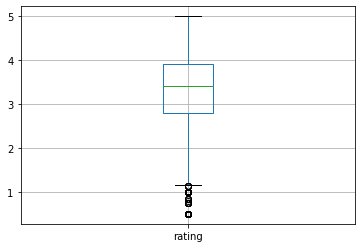

In [45]:
# Plota boxplot para visualizar anomalias
df_avg_ratings.boxplot(column='rating')

<AxesSubplot:>

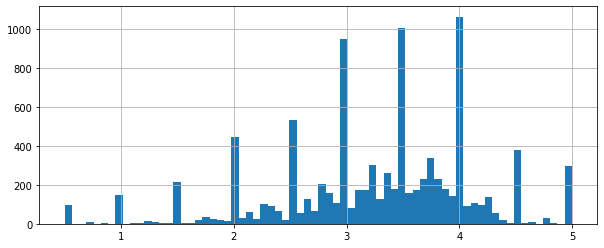

In [49]:
# Plota histograma para média das notas
plt.figure(figsize=(10,4))
df_avg_ratings['rating'].hist(bins=70)

Desenvolvendo modelo de recomendação

In [53]:
#cria matrix que relaciona usuário (linhas) e filmes (coluna) pela nota atribuída (dado)
mtx_movie_rating = df_movie_rating.pivot_table(index='userId', columns='title', values='rating')
mtx_movie_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [55]:
#constroi a matriz de correlação entre cada um dos filmes 
mtx_corr = mtx_movie_rating.corr()
mtx_corr.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#utiliza o método de pearson para gerar a correlação
#apenas considera as correlações entre filmes que tiveram mais de 50 avaliações
mtx_corr = mtx_movie_rating.corr(method='pearson', min_periods=50)
mtx_corr.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#Verificando o tamanho da matriz 
mtx_movie_rating.shape

(610, 9719)

In [62]:
#cria dataset do usuário teste (id=600) contendo somente filmes avaliados por ele
testUser = mtx_movie_rating.iloc[600].dropna()
testUser.head(10).sort_values(ascending=False)

title
12 Angry Men (1957)         5.0
Band of Brothers (2001)     5.0
Avengers, The (2012)        4.5
Batman Begins (2005)        4.5
Big Hero 6 (2014)           4.5
2012 (2009)                 4.0
Armageddon (1998)           4.0
Avatar (2009)               4.0
Beautiful Mind, A (2001)    4.0
Blade Runner 2049 (2017)    4.0
Name: 601, dtype: float64

In [63]:
#quantidade de avaliações realizadas pelo usuário
len(testUser)

101

In [68]:
#identificando o filme de indice 2
testUser.index[2]

'Armageddon (1998)'

In [67]:
#nota atribuída pelo usuário ao filme de indice 2 (Armageddon)
testUser[2]

4.0

In [70]:
#encontra as correlações não nulas do filme Armagedon
#descarta Nan
#ordena crescente
mtx_corr[testUser.index[2]].dropna().sort_values(ascending=False)

title
Armageddon (1998)                                                                 1.000000
Independence Day (a.k.a. ID4) (1996)                                              0.665768
True Lies (1994)                                                                  0.547632
Star Wars: Episode I - The Phantom Menace (1999)                                  0.457663
American Pie (1999)                                                               0.430223
Men in Black (a.k.a. MIB) (1997)                                                  0.424516
Indiana Jones and the Temple of Doom (1984)                                       0.420462
Braveheart (1995)                                                                 0.414973
Saving Private Ryan (1998)                                                        0.409837
Mission: Impossible (1996)                                                        0.394391
Speed (1994)                                                                      0.

In [75]:
#Cria uma série/sequência contendo todos os filmes similares aos filmes assistidos pelo usuário teste
#Itera em cada filmes assistido pelo usuário teste
##verifica a correlação do filme assistido i com todos os filmes da lista
##adiciona ao dataset "similar" os filmes similares ao assistido
##não considera os que apresentam valores nulos (não tem correlação)
##normaliza correlação para valores entre 0 e 5 (melhora comparação)
##adiciona linha similar à série similarMoviesCandidates


similarMoviesCandidates=pd.Series()
for i in range(0,len(testUser.index)):
    print("Adicionando filme similar a " +testUser.index[i]+ "...")
    #recuperando o filme que apresenta correlação
    similar=mtx_corr[testUser.index[i]].dropna()
    similar=similar.map(lambda x: x* testUser[i]) #escala para 5 os filmes com maior similaridade
    similarMoviesCandidates=similarMoviesCandidates.append(similar)

/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similarMoviesCandidates=pd.Series()
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be remo

Adicionando filme similar a 12 Angry Men (1957)...
Adicionando filme similar a 2012 (2009)...
Adicionando filme similar a Armageddon (1998)...
Adicionando filme similar a Avatar (2009)...
Adicionando filme similar a Avengers, The (2012)...
Adicionando filme similar a Band of Brothers (2001)...
Adicionando filme similar a Batman Begins (2005)...
Adicionando filme similar a Beautiful Mind, A (2001)...
Adicionando filme similar a Big Hero 6 (2014)...
Adicionando filme similar a Blade Runner 2049 (2017)...
Adicionando filme similar a Bourne Ultimatum, The (2007)...
Adicionando filme similar a Brave (2012)...
Adicionando filme similar a Bug's Life, A (1998)...
Adicionando filme similar a Casablanca (1942)...
Adicionando filme similar a Casino Royale (2006)...
Adicionando filme similar a Catch Me If You Can (2002)...
Adicionando filme similar a City of God (Cidade de Deus) (2002)...
Adicionando filme similar a Coco (2017)...
Adicionando filme similar a Contact (1997)...
Adicionando filme sim

/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarMoviesCandidates=similarMoviesCandidates.append(similar)
/var/folders/hn/zqmlf1cd4s3_llkx270x0kw80000gn/T/ipykernel_45474/2369637305.py:13: FutureWarning: The series.append method is deprecated and will be re

In [76]:
#ordena os filmes encontrados (série) em ordem de similaridade
similarMoviesCandidates.sort_values(inplace=True,ascending=False)
print(similarMoviesCandidates.head(15))

12 Angry Men (1957)                                          5.0
Monsters, Inc. (2001)                                        5.0
Departed, The (2006)                                         5.0
Fight Club (1999)                                            5.0
Finding Nemo (2003)                                          5.0
Godfather, The (1972)                                        5.0
How to Train Your Dragon (2010)                              5.0
Inception (2010)                                             5.0
Incredibles, The (2004)                                      5.0
Interstellar (2014)                                          5.0
Iron Man (2008)                                              5.0
Life Is Beautiful (La Vita è bella) (1997)                   5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    5.0
Lord of the Rings: The Two Towers, The (2002)                5.0
Matrix, The (1999)                                           5.0
dtype: float64
